In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas


In [2]:
import numpy as np
import pandas as pd

def PandasListToArray(DataFrames):
    exps = len(DataFrames)
    array  = np.zeros((exps,DataFrames[0]['FinishTime'].count()))
    
    for i in range(0,exps):
        exp = DataFrames[i]['FinishTime'].values
        exp.sort()
        exp = (exp - exp[0])/1000
        array[i,:] = exp
    
    return array
        

def TaskPerSecHist(array):
    exps = array.shape[0]
    temp = list()
    maxlen=0
    for i in range(0,exps):
        c =[0]
        sec =1
        for j in range(1,array.shape[1]):
            if array[i,j-1]<sec:
                c[sec-1]+=1
            else:
                sec+=1
                c.append(1)
        if len(c)> maxlen:
            maxlen=len(c)
        temp.append(c)
        
    hists = np.zeros((exps,maxlen))
    for i in range(0,exps):
        hists[i,0:len(temp[i])]=temp[i]
    
    return hists

In [3]:
Sprofiles_spark_1 = [pd.DataFrame.from_csv('SparkThroughput/Stampede/Exp1nodeS%02d.csv'%(i)) for i in range(0,10)]
Sprofiles_spark_2 = [pd.DataFrame.from_csv('SparkThroughput/Stampede/Exp2nodeS%02d.csv'%(i)) for i in range(0,10)]
Sprofiles_spark_3 = [pd.DataFrame.from_csv('SparkThroughput/Stampede/Exp3nodeS%02d.csv'%(i)) for i in range(0,10)]
Sprofiles_spark_4 = [pd.DataFrame.from_csv('SparkThroughput/Stampede/Exp4nodeS%02d.csv'%(i)) for i in range(0,10)]

Cprofiles_spark_1 = [pd.DataFrame.from_csv('SparkThroughput/Comet/Exp1node%02d.csv'%(i)) for i in range(0,10)]
Cprofiles_spark_2 = [pd.DataFrame.from_csv('SparkThroughput/Comet/Exp2node%02d.csv'%(i)) for i in range(0,10)]
Cprofiles_spark_3 = [pd.DataFrame.from_csv('SparkThroughput/Comet/Exp3node%02d.csv'%(i)) for i in range(0,10)]
Cprofiles_spark_4 = [pd.DataFrame.from_csv('SparkThroughput/Comet/Exp4node%02d.csv'%(i)) for i in range(0,10)]

Wprofiles_spark_1 = [pd.DataFrame.from_csv('SparkThroughput/Wrangler/Exp1node%02d.csv'%(i)) for i in range(0,10)]
Wprofiles_spark_2 = [pd.DataFrame.from_csv('SparkThroughput/Wrangler/Exp2node%02d.csv'%(i)) for i in range(0,10)]
Wprofiles_spark_3 = [pd.DataFrame.from_csv('SparkThroughput/Wrangler/Exp3node%02d.csv'%(i)) for i in range(0,10)]
Wprofiles_spark_4 = [pd.DataFrame.from_csv('SparkThroughput/Wrangler/Exp4node%02d.csv'%(i)) for i in range(0,10)]

In [4]:
Sthroughput_1 = TaskPerSecHist(PandasListToArray(Sprofiles_spark_1))
Sthroughput_2 = TaskPerSecHist(PandasListToArray(Sprofiles_spark_2))
Sthroughput_3 = TaskPerSecHist(PandasListToArray(Sprofiles_spark_3))
Sthroughput_4 = TaskPerSecHist(PandasListToArray(Sprofiles_spark_4))

Cthroughput_1 = TaskPerSecHist(PandasListToArray(Cprofiles_spark_1))
Cthroughput_2 = TaskPerSecHist(PandasListToArray(Cprofiles_spark_2))
Cthroughput_3 = TaskPerSecHist(PandasListToArray(Cprofiles_spark_3))
Cthroughput_4 = TaskPerSecHist(PandasListToArray(Cprofiles_spark_4))

Wthroughput_1 = TaskPerSecHist(PandasListToArray(Wprofiles_spark_1))
Wthroughput_2 = TaskPerSecHist(PandasListToArray(Wprofiles_spark_2))
Wthroughput_3 = TaskPerSecHist(PandasListToArray(Wprofiles_spark_3))
Wthroughput_4 = TaskPerSecHist(PandasListToArray(Wprofiles_spark_4))

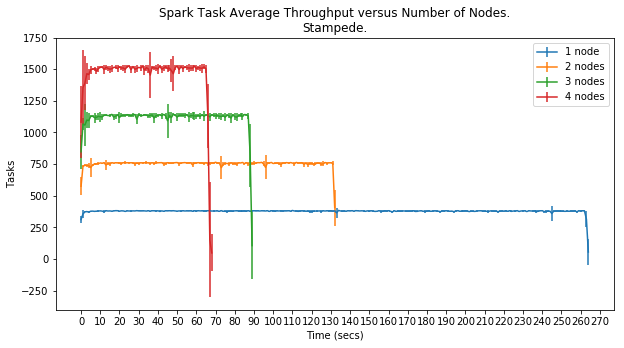

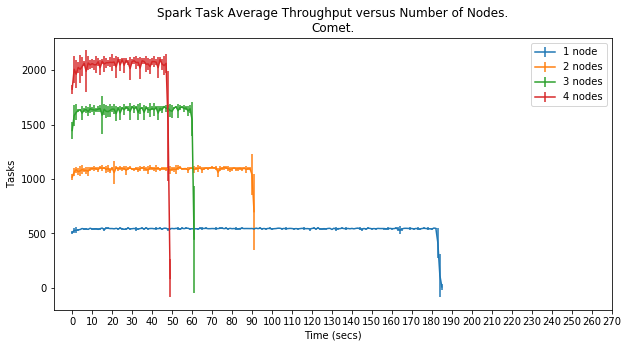

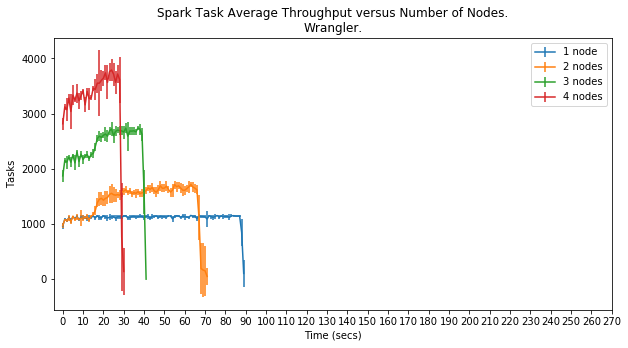

In [5]:
fig = plt.figure()
plt.errorbar(range(0,Sthroughput_1.shape[1]),Sthroughput_1.mean(0),yerr=Sthroughput_1.std(0),label='1 node')
plt.errorbar(range(0,Sthroughput_2.shape[1]),Sthroughput_2.mean(0),yerr=Sthroughput_2.std(0),label='2 nodes')
plt.errorbar(range(0,Sthroughput_3.shape[1]),Sthroughput_3.mean(0),yerr=Sthroughput_3.std(0),label='3 nodes')
plt.errorbar(range(0,Sthroughput_4.shape[1]),Sthroughput_4.mean(0),yerr=Sthroughput_4.std(0),label='4 nodes')
plt.xticks(np.arange(0,280, 10.0))
fig.set_size_inches(10,5)
plt.legend()
plt.title('Spark Task Average Throughput versus Number of Nodes.\nStampede.')
plt.ylabel('Tasks')
plt.xlabel('Time (secs)')
plt.savefig('SparkAveThroughputvsNodesSt.pdf',dpi=800,bbox_inches='tight')
plt.savefig('SparkAveThroughputvsNodesSt.png',dpi=800,bbox_inches='tight')

fig = plt.figure()
plt.errorbar(range(0,Cthroughput_1.shape[1]),Cthroughput_1.mean(0),yerr=Cthroughput_1.std(0),label='1 node')
plt.errorbar(range(0,Cthroughput_2.shape[1]),Cthroughput_2.mean(0),yerr=Cthroughput_2.std(0),label='2 nodes')
plt.errorbar(range(0,Cthroughput_3.shape[1]),Cthroughput_3.mean(0),yerr=Cthroughput_3.std(0),label='3 nodes')
plt.errorbar(range(0,Cthroughput_4.shape[1]),Cthroughput_4.mean(0),yerr=Cthroughput_4.std(0),label='4 nodes')
plt.xticks(np.arange(0,280, 10.0))
fig.set_size_inches(10,5)
plt.legend()
plt.title('Spark Task Average Throughput versus Number of Nodes.\nComet.')
plt.ylabel('Tasks')
plt.xlabel('Time (secs)')
plt.savefig('SparkAveThroughputvsNodesCo.pdf',dpi=800,bbox_inches='tight')
plt.savefig('SparkAveThroughputvsNodesCo.png',dpi=800,bbox_inches='tight')


fig = plt.figure()
plt.errorbar(range(0,Wthroughput_1.shape[1]),Wthroughput_1.mean(0),yerr=Wthroughput_1.std(0),label='1 node')
plt.errorbar(range(0,Wthroughput_2.shape[1]),Wthroughput_2.mean(0),yerr=Wthroughput_2.std(0),label='2 nodes')
plt.errorbar(range(0,Wthroughput_3.shape[1]),Wthroughput_3.mean(0),yerr=Wthroughput_3.std(0),label='3 nodes')
plt.errorbar(range(0,Wthroughput_4.shape[1]),Wthroughput_4.mean(0),yerr=Wthroughput_4.std(0),label='4 nodes')
plt.xticks(np.arange(0,280, 10.0))
fig.set_size_inches(10,5)
plt.legend()
plt.title('Spark Task Average Throughput versus Number of Nodes.\nWrangler.')
plt.ylabel('Tasks')
plt.xlabel('Time (secs)')
plt.savefig('SparkAveThroughputvsNodesWr.pdf',dpi=800,bbox_inches='tight')
plt.savefig('SparkAveThroughputvsNodesWr.png',dpi=800,bbox_inches='tight')

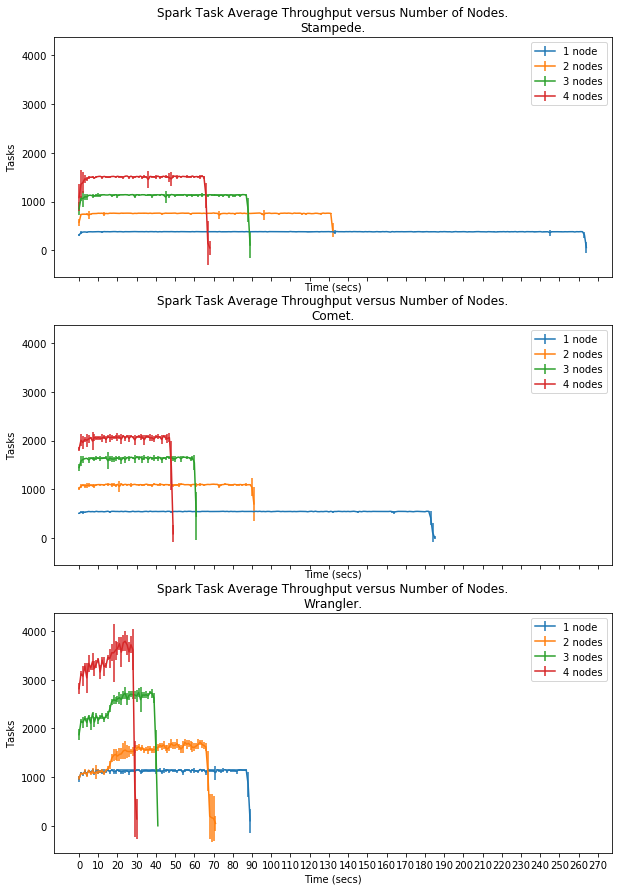

In [14]:
fig,axes = plt.subplots(nrows=3,ncols=1,sharex=True,sharey=True)
axes[0].errorbar(range(0,Sthroughput_1.shape[1]),Sthroughput_1.mean(0),yerr=Sthroughput_1.std(0),label='1 node')
axes[0].errorbar(range(0,Sthroughput_2.shape[1]),Sthroughput_2.mean(0),yerr=Sthroughput_2.std(0),label='2 nodes')
axes[0].errorbar(range(0,Sthroughput_3.shape[1]),Sthroughput_3.mean(0),yerr=Sthroughput_3.std(0),label='3 nodes')
axes[0].errorbar(range(0,Sthroughput_4.shape[1]),Sthroughput_4.mean(0),yerr=Sthroughput_4.std(0),label='4 nodes')
axes[0].set_xticks(np.arange(0,280, 10.0))
axes[0].legend()
axes[0].set_title('Spark Task Average Throughput versus Number of Nodes.\nStampede.')
axes[0].set_ylabel('Tasks')
axes[0].set_xlabel('Time (secs)')

axes[1].errorbar(range(0,Cthroughput_1.shape[1]),Cthroughput_1.mean(0),yerr=Cthroughput_1.std(0),label='1 node')
axes[1].errorbar(range(0,Cthroughput_2.shape[1]),Cthroughput_2.mean(0),yerr=Cthroughput_2.std(0),label='2 nodes')
axes[1].errorbar(range(0,Cthroughput_3.shape[1]),Cthroughput_3.mean(0),yerr=Cthroughput_3.std(0),label='3 nodes')
axes[1].errorbar(range(0,Cthroughput_4.shape[1]),Cthroughput_4.mean(0),yerr=Cthroughput_4.std(0),label='4 nodes')
axes[1].legend()
axes[1].set_title('Spark Task Average Throughput versus Number of Nodes.\nComet.')
axes[1].set_ylabel('Tasks')
axes[1].set_xlabel('Time (secs)')

axes[2].errorbar(range(0,Wthroughput_1.shape[1]),Wthroughput_1.mean(0),yerr=Wthroughput_1.std(0),label='1 node')
axes[2].errorbar(range(0,Wthroughput_2.shape[1]),Wthroughput_2.mean(0),yerr=Wthroughput_2.std(0),label='2 nodes')
axes[2].errorbar(range(0,Wthroughput_3.shape[1]),Wthroughput_3.mean(0),yerr=Wthroughput_3.std(0),label='3 nodes')
axes[2].errorbar(range(0,Wthroughput_4.shape[1]),Wthroughput_4.mean(0),yerr=Wthroughput_4.std(0),label='4 nodes')
plt.xticks(np.arange(0,280, 10.0))
fig.set_size_inches(10,15)
axes[2].legend()
axes[2].set_title('Spark Task Average Throughput versus Number of Nodes.\nWrangler.')
axes[2].set_ylabel('Tasks')
axes[2].set_xlabel('Time (secs)')
plt.savefig('SparkAveThroughputvsNodesvsResource.png',dpi=800,bbox_inches='tight')

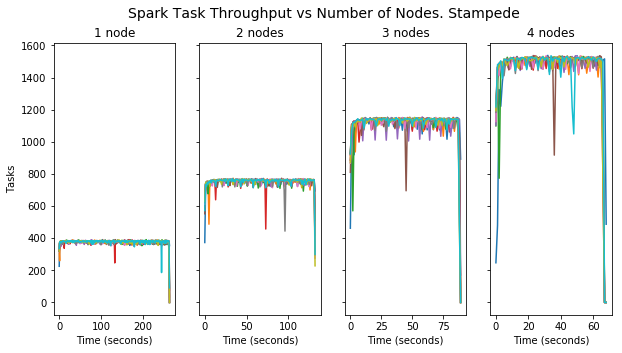

In [6]:
fig, axes= plt.subplots(nrows=1,ncols=4,sharey=True)
fig.set_size_inches(10,5)
axes[0].set_ylabel('Tasks')
axes[0].set_xlabel('Time (seconds)')
axes[1].set_xlabel('Time (seconds)')
axes[2].set_xlabel('Time (seconds)')
axes[3].set_xlabel('Time (seconds)')
axes[0].set_title('1 node')
axes[1].set_title('2 nodes')
axes[2].set_title('3 nodes')
axes[3].set_title('4 nodes')

for i in range(0,10):
    axes[0].plot(range(0,Sthroughput_1.shape[1]),Sthroughput_1[i,:])
    axes[1].plot(range(0,Sthroughput_2.shape[1]),Sthroughput_2[i,:])
    axes[2].plot(range(0,Sthroughput_3.shape[1]),Sthroughput_3[i,:])
    axes[3].plot(range(0,Sthroughput_4.shape[1]),Sthroughput_4[i,:])
fig.suptitle('Spark Task Throughput vs Number of Nodes. Stampede',fontsize=14)
plt.savefig('SparkThroughputvsNodesSt.pdf',dpi=800,bbox_inches='tight')
plt.savefig('SparkThroughputvsNodesSt.png',dpi=800,bbox_inches='tight')

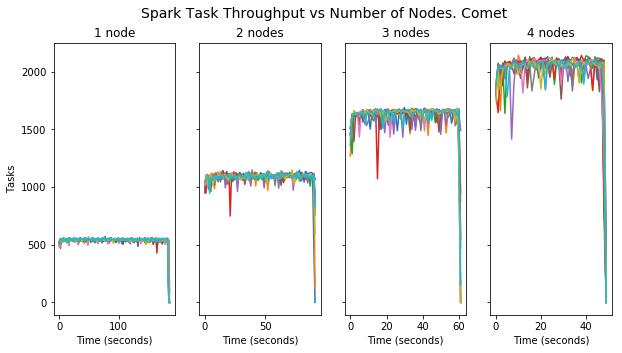

In [7]:
fig, axes= plt.subplots(nrows=1,ncols=4,sharey=True)
fig.set_size_inches(10,5)
axes[0].set_ylabel('Tasks')
axes[0].set_xlabel('Time (seconds)')
axes[1].set_xlabel('Time (seconds)')
axes[2].set_xlabel('Time (seconds)')
axes[3].set_xlabel('Time (seconds)')
axes[0].set_title('1 node')
axes[1].set_title('2 nodes')
axes[2].set_title('3 nodes')
axes[3].set_title('4 nodes')

for i in range(0,10):
    axes[0].plot(range(0,Cthroughput_1.shape[1]),Cthroughput_1[i,:])
    axes[1].plot(range(0,Cthroughput_2.shape[1]),Cthroughput_2[i,:])
    axes[2].plot(range(0,Cthroughput_3.shape[1]),Cthroughput_3[i,:])
    axes[3].plot(range(0,Cthroughput_4.shape[1]),Cthroughput_4[i,:])
fig.suptitle('Spark Task Throughput vs Number of Nodes. Comet',fontsize=14)
plt.savefig('SparkThroughputvsNodesCo.pdf',dpi=800,bbox_inches='tight')
plt.savefig('SparkThroughputvsNodesCo.png',dpi=800,bbox_inches='tight')

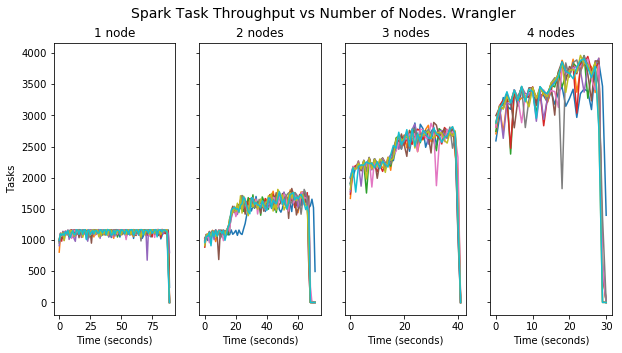

In [8]:
fig, axes= plt.subplots(nrows=1,ncols=4,sharey=True)
fig.set_size_inches(10,5)
axes[0].set_ylabel('Tasks')
axes[0].set_xlabel('Time (seconds)')
axes[1].set_xlabel('Time (seconds)')
axes[2].set_xlabel('Time (seconds)')
axes[3].set_xlabel('Time (seconds)')
axes[0].set_title('1 node')
axes[1].set_title('2 nodes')
axes[2].set_title('3 nodes')
axes[3].set_title('4 nodes')

for i in range(0,10):
    axes[0].plot(range(0,Wthroughput_1.shape[1]),Wthroughput_1[i,:])
    axes[1].plot(range(0,Wthroughput_2.shape[1]),Wthroughput_2[i,:])
    axes[2].plot(range(0,Wthroughput_3.shape[1]),Wthroughput_3[i,:])
    axes[3].plot(range(0,Wthroughput_4.shape[1]),Wthroughput_4[i,:])
fig.suptitle('Spark Task Throughput vs Number of Nodes. Wrangler',fontsize=14)
plt.savefig('SparkThroughputvsNodesWr.pdf',dpi=800,bbox_inches='tight')
plt.savefig('SparkThroughputvsNodesWr.png',dpi=800,bbox_inches='tight')